In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time    

In [2]:
transform = transforms.Compose([#transforms.Resize((256,256)),  
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


train_data_path = './horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1027, shuffle=False, num_workers=1)  

validation_data_path = './horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=False, num_workers=1)  


trainList = list()
validList = list()
trainLabelList = list()
validLabelList = list()

for i, data in enumerate(trainloader):
    # inputs is the image
    # labels is the class of the image
    inputs, labels = data

    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
    batch_size = inputs.shape[0]

    # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
    # change inputs to matrix 10000*batch_size
    for bat_idx in range(batch_size):

        targMat = inputs[bat_idx][0]

        colVec = np.reshape(targMat, (np.product(targMat.shape), 1), 'F')

        if(bat_idx == 0):
            batMat = colVec
        else:
            batMat = np.concatenate((batMat, colVec), axis = 1)         

    # Add ones because of the value b in coefficient
    ones = np.ones((1, batch_size), dtype = int)
    batMat = np.concatenate((batMat, ones))
    trainList.append(batMat)
    trainLabelList.append(labels)
    
# load validation images of the batch size for every iteration
for i, data in enumerate(valloader):

    # inputs is the image
    # labels is the class of the image
    inputs, labels = data

    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
     # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]

    batch_size = inputs.shape[0]

    # Change Inputs to matrix 10000*batch_size

    for bat_idx in range(batch_size):
        targMat = inputs[bat_idx][0]
        colVec = np.reshape(targMat, (np.product(targMat.shape), 1), 'F')

        if(bat_idx == 0):
            batMat = colVec
        else:
            batMat = np.concatenate((batMat,colVec), axis = 1)
        
    # Add ones because of the value b in coefficient
    ones = np.ones((1, batch_size), dtype = int)
    batMat = np.concatenate((batMat, ones))
    validList.append(batMat)
    validLabelList.append(labels)

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def tanh(z):
    result = ((np.exp(z) - np.exp(-z)) / (np.exp(z)+np.exp(-z))) 
    return result

def relu(z):
    return z * (z > 0)

def lrelu(z):
    alpha = 0.01
    x1 = z * (z > 0)
    x2 = z * (z<=0) * alpha
    return x1 + x2

In [4]:
## #Initialize Coefs


sigmoid_w_0 = np.zeros((1,10001), dtype = float)
a = np.ones((1,10001), dtype = float)
sigmoid_w_0 =np.concatenate((sigmoid_w_0, a), axis = 0)
a = 2 * np.ones((1,10001), dtype = float)
sigmoid_w_0 =np.concatenate((sigmoid_w_0, a), axis = 0)
a = 3 * np.ones((1,10001), dtype = float)
sigmoid_w_0 =np.concatenate((sigmoid_w_0, a), axis = 0)


sigmoid_w_1 = np.array([[0,0,0,0],
              [ 1, 1, 1, 1],
              [ 2, 2, 2, 2]], dtype = float)

sigmoid_w_2 = np.array([[0.0, 0.0, 0.0]])



tanh_w_0 = np.zeros((1,10001), dtype = float)
a = np.ones((1,10001), dtype = float) * 0.01
tanh_w_0 =np.concatenate((tanh_w_0, a), axis = 0)
a = -2 * np.ones((1,10001), dtype = float) * 0.01
tanh_w_0 =np.concatenate((tanh_w_0, a), axis = 0)
a = 3 * np.ones((1,10001), dtype = float) * 0.01
tanh_w_0 =np.concatenate((tanh_w_0, a), axis = 0)


tanh_w_1 = np.array([[0,0,0,0],
              [-0.01,-0.01,-0.01,-0.01],
              [0.02,0.02,0.02,0.02]], dtype = float)

tanh_w_2 = np.array([[0.1, 0.1, 0.1]])



relu_w_0 = np.zeros((1,10001), dtype = float)
a = np.ones((1,10001), dtype = float) * 0.001
relu_w_0 =np.concatenate((relu_w_0, a), axis = 0)
a = 2 * np.ones((1,10001), dtype = float) * 0.001
relu_w_0 =np.concatenate((relu_w_0, a), axis = 0)
a = 3 * np.ones((1,10001), dtype = float) * 0.001
relu_w_0 =np.concatenate((relu_w_0, a), axis = 0)


relu_w_1 = np.array([[0,0,0,0],
              [0.001,0.001,0.001,0.001],
              [0.002,0.002,0.002,0.002]], dtype = float)

relu_w_2 = np.zeros((1, 3), dtype = float)






lrelu_w_0 = np.zeros((1,10001), dtype = float)
a = np.ones((1,10001), dtype = float) * 0.001
lrelu_w_0 =np.concatenate((lrelu_w_0, a), axis = 0)
a = 2 * np.ones((1,10001), dtype = float) * 0.001
lrelu_w_0 =np.concatenate((lrelu_w_0, a), axis = 0)
a = 3 * np.ones((1,10001), dtype = float) * 0.001
lrelu_w_0 =np.concatenate((lrelu_w_0, a), axis = 0)


lrelu_w_1 = np.array([[0,0,0,0],
              [0.001,0.001,0.001,0.001],
              [0.002,0.002,0.002,0.002]], dtype = float)

lrelu_w_2 = np.zeros((1, 3), dtype = float)


#set DataNum
totalTrainDataNum = len(trainloader.dataset)
totalValidDataNum  = len(valloader.dataset)

#Set Learning Rate
sigmoidLrnRate = 0.01
tanhLrnRate = 0.001
reluLrnRate = 0.002
lreluLrnRate = 0.002

sigmoidMaxAcc = 0
tanhMaxAcc = 0
reluMaxAcc = 0
lreluMaxAcc = 0

sigmoidMinLoss = 1
tanhMinLoss = 1
reluMinLoss = 1
lreluMinLoss = 1


# Set Loss Lists
sigmoidLrnLoss = list()
sigmoidValLoss = list()

tanhLrnLoss = list()
tanhValLoss = list()

reluLrnLoss = list()
reluValLoss = list()

lreluLrnLoss = list()
lreluValLoss = list()

# Set Accurate Lists
sigmoidLrnAcc = list()
sigmoidValAcc = list()

tanhLrnAcc = list()
tanhValAcc = list()

reluLrnAcc = list()
reluValAcc = list()

lreluLrnAcc = list()
lreluValAcc = list()

epoch = -1
sigmoidLrnAccRate = 0
tanhLrnAccRate = 0
reluLrnAccRate = 0
lreluLrnAccRate = 0



s = time.time()
#while(sigmoidLrnAccRate < 1  or tanhLrnAccRate < 1 or reluLrnAccRate < 1 or lreluLrnAccRate < 1):
while(epoch < 50000):
    epoch += 1

    
    #Set Sum of Cor to 0
    sigmoidCor = 0
    tanhCor = 0
    reluCor = 0
    lreluCor = 0
    

    
    
    
    
    
    sigmoid_a_0 = trainList[0]
    tanh_a_0 = trainList[0]
    relu_a_0 = trainList[0]
    lrelu_a_0 = trainList[0]
    



    
    batch_size = sigmoid_a_0.shape[1]

    # Start Regression Calculation
    sigmoid_z_0 = np.dot(sigmoid_w_0, sigmoid_a_0)
    tanh_z_0 = np.dot(tanh_w_0, tanh_a_0)
    relu_z_0 = np.dot(relu_w_0, relu_a_0)
    lrelu_z_0 = np.dot(lrelu_w_0, lrelu_a_0)
  
    
    sigmoid_a_1 = sigmoid(sigmoid_z_0)
    tanh_a_1 = tanh(tanh_z_0)
    relu_a_1 = relu(relu_z_0)
    lrelu_a_1 = lrelu(lrelu_z_0)



    sigmoid_z_1 = np.dot(sigmoid_w_1, sigmoid_a_1)
    tanh_z_1 = np.dot(tanh_w_1, tanh_a_1)
    relu_z_1 = np.dot(relu_w_1, relu_a_1)
    lrelu_z_1 = np.dot(lrelu_w_1, lrelu_a_1)
    
    sigmoid_a_2 = sigmoid(sigmoid_z_1)
    tanh_a_2 = tanh(tanh_z_1)
    relu_a_2 = relu(relu_z_1)
    lrelu_a_2 = lrelu(lrelu_z_1)

    
    sigmoid_z_2 = np.dot(sigmoid_w_2, sigmoid_a_2)
    tanh_z_2 = np.dot(tanh_w_2, tanh_a_2)
    relu_z_2 = np.dot(relu_w_2, relu_a_2)
    lrelu_z_2 = np.dot(lrelu_w_2, lrelu_a_2)


    
    
    sigmoid_a_3 = sigmoid(sigmoid_z_2)
    tanh_a_3 = sigmoid(tanh_z_2)
    relu_a_3 = sigmoid(relu_z_2)
    lrelu_a_3 = sigmoid(lrelu_z_2)
    

  #  print(relu_a_0)
   # print(relu_w_0)
   # print(relu_z_0)
    
  #  print(relu_a_1)
  #  print(relu_w_1)
  #  print(relu_z_1)
    
  #  print(relu_a_2)
  #  print(relu_w_2)
  #  print(relu_z_2)
    
  #  print(relu_a_3)
    



    sigmoid_dz_2 = np.subtract(sigmoid_a_3, trainLabelList[0])
    tanh_dz_2 = np.subtract(tanh_a_3, trainLabelList[0])
    relu_dz_2 = np.subtract(relu_a_3, trainLabelList[0])
    lrelu_dz_2 = np.subtract(lrelu_a_3, trainLabelList[0])
    
    sigmoid_dw_2 = np.dot(sigmoid_dz_2, sigmoid_a_2.T) / totalTrainDataNum
    tanh_dw_2 = np.dot(tanh_dz_2, tanh_a_2.T) / totalTrainDataNum
    relu_dw_2 = np.dot(relu_dz_2, relu_a_2.T) / totalTrainDataNum
    lrelu_dw_2 = np.dot(lrelu_dz_2, lrelu_a_2.T) / totalTrainDataNum
    
   
    
    sigmoid_dz_1 = np.dot(sigmoid_w_2.T, sigmoid_dz_2) * sigmoid_a_2 * (1-sigmoid_a_2)
    tanh_dz_1 = np.dot(tanh_w_2.T, tanh_dz_2) * (1 - (tanh_a_2 * tanh_a_2))
    relu_dz_1 = np.dot(relu_w_2.T, relu_dz_2) * (1 * (relu_z_1 > 0))
    lrelu_dz_1 = np.dot(lrelu_w_2.T, lrelu_dz_2) * ((1 * (lrelu_z_1 > 0)) + 0.01 * (lrelu_z_1 <= 0))
    
    sigmoid_dw_1 = np.dot(sigmoid_dz_1, sigmoid_a_1.T) / totalTrainDataNum
    tanh_dw_1 = np.dot(tanh_dz_1, tanh_a_1.T) / totalTrainDataNum
    relu_dw_1 = np.dot(relu_dz_1, relu_a_1.T) / totalTrainDataNum
    lrelu_dw_1 = np.dot(lrelu_dz_1, lrelu_a_1.T) / totalTrainDataNum
    

    sigmoid_dz_0 = np.dot(sigmoid_w_1.T, sigmoid_dz_1) * sigmoid_a_1 * (1-sigmoid_a_1)
    tanh_dz_0 = np.dot(tanh_w_1.T, tanh_dz_1) * (1 - (tanh_a_1 * tanh_a_1))
    relu_dz_0 = np.dot(relu_w_1.T, relu_dz_1) * (1 * (relu_z_0 > 0))
    lrelu_dz_0 = np.dot(lrelu_w_1.T, lrelu_dz_1) * ((1 * (lrelu_z_0 > 0)) + 0.01 * (lrelu_z_0 <= 0))
    
    
    sigmoid_dw_0 = np.dot(sigmoid_dz_0, sigmoid_a_0.T) / totalTrainDataNum
    tanh_dw_0 = np.dot(tanh_dz_0, tanh_a_0.T) / totalTrainDataNum
    relu_dw_0 = np.dot(relu_dz_0, relu_a_0.T) / totalTrainDataNum
    lrelu_dw_0 = np.dot(lrelu_dz_0, lrelu_a_0.T) / totalTrainDataNum
    

    
    sigmoid_w_2 -= sigmoidLrnRate * sigmoid_dw_2
    tanh_w_2 -= tanhLrnRate * tanh_dw_2
    relu_w_2 -= reluLrnRate * relu_dw_2
    lrelu_w_2 -= lreluLrnRate * lrelu_dw_2
    
    sigmoid_w_1 -= sigmoidLrnRate * sigmoid_dw_1
    tanh_w_1 -= tanhLrnRate * tanh_dw_1
    relu_w_1 -= reluLrnRate * relu_dw_1
    lrelu_w_1 -= lreluLrnRate * lrelu_dw_1

    sigmoid_w_0 -= sigmoidLrnRate * sigmoid_dw_0
    tanh_w_0 -= tanhLrnRate * tanh_dw_0
    relu_w_0 -= reluLrnRate * relu_dw_0
    lrelu_w_0 -= lreluLrnRate * lrelu_dw_0
    
    
    #Calculate Total Loss
    sigmoid_a_3 = torch.from_numpy(sigmoid_a_3)
    tanh_a_3 = torch.from_numpy(tanh_a_3)
    relu_a_3 = torch.from_numpy(relu_a_3)
    lrelu_a_3 = torch.from_numpy(lrelu_a_3)
    
    dLabels = trainLabelList[0].double()
    
    sigmoidSumL = (-(dLabels) * np.log(sigmoid_a_3) - (1-dLabels) * np.log(1- sigmoid_a_3)).sum()
    tanhSumL = (-(dLabels) * np.log(tanh_a_3) - (1-dLabels) * np.log(1- tanh_a_3)).sum()
    reluSumL = (-(dLabels) * np.log(relu_a_3) - (1-dLabels) * np.log(1- relu_a_3)).sum()
    lreluSumL = (-(dLabels) * np.log(lrelu_a_3) - (1-dLabels) * np.log(1- lrelu_a_3)).sum()
    
    
    sigmoidLrnLoss.append(sigmoidSumL / totalTrainDataNum)
    tanhLrnLoss.append(tanhSumL / totalTrainDataNum)
    reluLrnLoss.append(reluSumL / totalTrainDataNum)
    lreluLrnLoss.append(lreluSumL / totalTrainDataNum)


    
    
    # Calculate Accuracy

    for batIdx in range(batch_size):

        if(sigmoid_a_3[0][batIdx] <= 0.5 and trainLabelList[0][batIdx] == 0):
            sigmoidCor += 1

        if(sigmoid_a_3[0][batIdx] > 0.5 and trainLabelList[0][batIdx] == 1):
            sigmoidCor += 1
        
        if(tanh_a_3[0][batIdx] <= 0.5 and trainLabelList[0][batIdx] == 0):
            tanhCor += 1

        if(tanh_a_3[0][batIdx] > 0.5 and trainLabelList[0][batIdx] == 1):
            tanhCor += 1
                
        if(relu_a_3[0][batIdx] <= 0.5 and trainLabelList[0][batIdx] == 0):
            reluCor += 1

        if(relu_a_3[0][batIdx] > 0.5 and trainLabelList[0][batIdx] == 1):
            reluCor += 1
            
        if(lrelu_a_3[0][batIdx] <= 0.5 and trainLabelList[0][batIdx] == 0):
            lreluCor += 1

        if(lrelu_a_3[0][batIdx] > 0.5 and trainLabelList[0][batIdx] == 1):
            lreluCor += 1
            
    
    # Calculate Accuracy
    
    sigmoidLrnAccRate = sigmoidCor / totalTrainDataNum
    tanhLrnAccRate = tanhCor / totalTrainDataNum
    reluLrnAccRate = reluCor / totalTrainDataNum
    lreluLrnAccRate = lreluCor / totalTrainDataNum
    
    sigmoidLrnAcc.append(sigmoidLrnAccRate)
    tanhLrnAcc.append(tanhLrnAccRate)
    reluLrnAcc.append(reluLrnAccRate)
    lreluLrnAcc.append(lreluLrnAccRate)
    


    #Set Sum of Cor to 0
    sigmoidValCor = 0
    tanhValCor = 0
    reluValCor = 0
    lreluValCor = 0
    


    sigmoid_a_0 = validList[0]
    tanh_a_0 = validList[0]
    relu_a_0 = validList[0]
    lrelu_a_0 = validList[0]
        
    batch_size = sigmoid_a_0.shape[1]

    # Start Regression Calculation
    sigmoid_z_0 = np.dot(sigmoid_w_0, sigmoid_a_0)
    
    tanh_z_0 = np.dot(tanh_w_0, tanh_a_0)
    relu_z_0 = np.dot(relu_w_0, relu_a_0)
    lrelu_z_0 = np.dot(lrelu_w_0, lrelu_a_0)
    
    sigmoid_a_1 = sigmoid(sigmoid_z_0)
    tanh_a_1 = tanh(tanh_z_0)
    relu_a_1 = relu(relu_z_0)
    lrelu_a_1 = lrelu(lrelu_z_0)


    sigmoid_z_1 = np.dot(sigmoid_w_1, sigmoid_a_1)
    tanh_z_1 = np.dot(tanh_w_1, tanh_a_1)
    relu_z_1 = np.dot(relu_w_1, relu_a_1)
    lrelu_z_1 = np.dot(lrelu_w_1, lrelu_a_1)
    
    sigmoid_a_2 = sigmoid(sigmoid_z_1)
    tanh_a_2 = tanh(tanh_z_1)
    relu_a_2 = relu(relu_z_1)
    lrelu_a_2 = lrelu(lrelu_z_1)
    
    sigmoid_z_2 = np.dot(sigmoid_w_2, sigmoid_a_2)
    tanh_z_2 = np.dot(tanh_w_2, tanh_a_2)
    relu_z_2 = np.dot(relu_w_2, relu_a_2)
    lrelu_z_2 = np.dot(lrelu_w_2, lrelu_a_2)
    
    sigmoid_a_3 = sigmoid(sigmoid_z_2)
    tanh_a_3 = sigmoid(tanh_z_2)
    relu_a_3 = sigmoid(relu_z_2)
    lrelu_a_3 = sigmoid(lrelu_z_2)
    
    #Calculate Total Loss
    sigmoid_a_3 = torch.from_numpy(sigmoid_a_3)
    tanh_a_3 = torch.from_numpy(tanh_a_3)
    relu_a_3 = torch.from_numpy(relu_a_3)
    lrelu_a_3 = torch.from_numpy(lrelu_a_3)
    
    dLabels = validLabelList[0].double()
    
    sigmoidSumL = (-(dLabels) * np.log(sigmoid_a_3) - (1-dLabels) * np.log(1- sigmoid_a_3)).sum()
    tanhSumL = (-(dLabels) * np.log(tanh_a_3) - (1-dLabels) * np.log(1- tanh_a_3)).sum()
    reluSumL = (-(dLabels) * np.log(relu_a_3) - (1-dLabels) * np.log(1- relu_a_3)).sum()
    lreluSumL = (-(dLabels) * np.log(lrelu_a_3) - (1-dLabels) * np.log(1- lrelu_a_3)).sum()
    
    
    sigmoidValLoss.append(sigmoidSumL / totalValidDataNum)
    tanhValLoss.append(tanhSumL / totalValidDataNum)
    reluValLoss.append(reluSumL / totalValidDataNum)
    lreluValLoss.append(lreluSumL / totalValidDataNum)


    
    
    # Calculate Accuracy

    for batIdx in range(batch_size):

        if(sigmoid_a_3[0][batIdx] <= 0.5 and validLabelList[0][batIdx] == 0):
            sigmoidValCor += 1

        if(sigmoid_a_3[0][batIdx] > 0.5 and validLabelList[0][batIdx] == 1):
            sigmoidValCor += 1
        
        if(tanh_a_3[0][batIdx] <= 0.5 and validLabelList[0][batIdx] == 0):
            tanhValCor += 1

        if(tanh_a_3[0][batIdx] > 0.5 and validLabelList[0][batIdx] == 1):
            tanhValCor += 1
                
        if(relu_a_3[0][batIdx] <= 0.5 and validLabelList[0][batIdx] == 0):
            reluValCor += 1

        if(relu_a_3[0][batIdx] > 0.5 and validLabelList[0][batIdx] == 1):
            reluValCor += 1
            
        if(lrelu_a_3[0][batIdx] <= 0.5 and validLabelList[0][batIdx] == 0):
            lreluValCor += 1

        if(lrelu_a_3[0][batIdx] > 0.5 and validLabelList[0][batIdx] == 1):
            lreluValCor += 1
            
    
    # Calculate Accuracy
    
    sigmoidValAccRate = sigmoidValCor / totalValidDataNum
    tanhValAccRate = tanhValCor / totalValidDataNum
    reluValAccRate = reluValCor / totalValidDataNum
    lreluValAccRate = lreluValCor / totalValidDataNum
    
    sigmoidValAcc.append(sigmoidValAccRate)
    tanhValAcc.append(tanhValAccRate)
    reluValAcc.append(reluValAccRate)
    lreluValAcc.append(lreluValAccRate)
    
    if sigmoidMaxAcc < sigmoidValAccRate:
        sigmoidMaxAcc = sigmoidValAccRate
        sigmoidMinLoss = sigmoidValLoss[-1]
        
    
    if tanhMaxAcc < tanhValAccRate:
        tanhMaxAcc = tanhValAccRate
        tanhMinLoss = tanhValLoss[-1]
        
    if reluMaxAcc < reluValAccRate:
        reluMaxAcc = reluValAccRate
        reluMinLoss = reluValLoss[-1]
        
    if lreluMaxAcc < lreluValAccRate:
        lreluMaxAcc = lreluValAccRate
        lreluMinLoss = lreluValLoss[-1]
        
    
    
    
    
    '''
    if epoch%1000 == 0:
        print("-------------- epoch %6d" % epoch, "--------------")
        print("sigmoidLrnLoss : ", sigmoidLrnLoss[-1].item())
        print("tanhLrnLoss : ", tanhLrnLoss[-1].item())
        print("reluLrnLoss : ", reluLrnLoss[-1].item())
        print("lreluLrnLoss : ", lreluLrnLoss[-1].item())
        print("sigmoidValLoss : ", sigmoidValLoss[-1].item())
        print("tanhValLoss : ", tanhValLoss[-1].item())
        print("reluValLoss : ", reluValLoss[-1].item())
        print("lreluValLoss : ", lreluValLoss[-1].item())
        print("-------------------------------------------")
    '''
    
    
elapsedT = time.time() - s
h = (int)(elapsedT / 3600)
elapsedT %= 3600
m = (int)(elapsedT / 60)
elapsedT %= 60
s = elapsedT

#print("eTime : %dh %dm %fs" % (h, m, s)  )
  

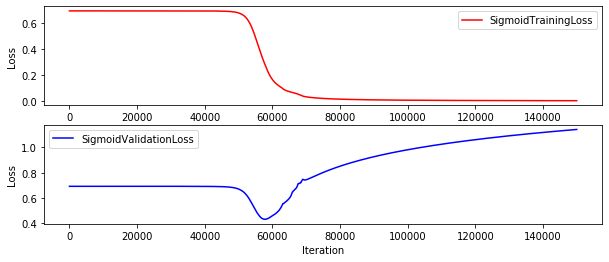

In [5]:
#Plotting Loss

fig, axs = plt.subplots(2,1, figsize = (10,4))


axs[0].plot(sigmoidLrnLoss, color = 'red', label = "SigmoidTrainingLoss")


axs[1].plot(sigmoidValLoss, color = 'blue', label = "SigmoidValidationLoss")

axs[0].set(ylabel = 'Loss')
axs[1].set(xlabel = 'Iteration', ylabel = 'Loss')

axs[0].legend()
axs[1].legend()

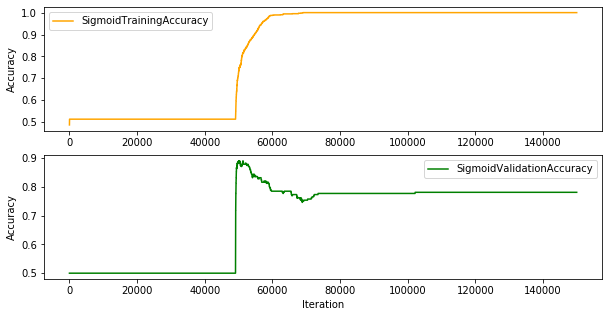

In [6]:
#Plotting Accuracy
fig, axs = plt.subplots(2,1, figsize = (10,5))


axs[0].plot(sigmoidLrnAcc, color = 'orange', label = "SigmoidTrainingAccuracy")


axs[1].plot(sigmoidValAcc, color = 'green', label = "SigmoidValidationAccuracy")

axs[0].set(ylabel = 'Accuracy')
axs[1].set(xlabel = 'Iteration', ylabel = 'Accuracy')

axs[0].legend()
axs[1].legend()

In [7]:
print("<At convergence>")
print()
print("  Dataset   |   Loss | Accuracy")
print("  Training  | %.4f | %.4f" % (sigmoidLrnLoss[-1], sigmoidLrnAcc[-1]))
print(" Validation | %.4f | %.4f" % (sigmoidValLoss[-1], sigmoidValAcc[-1]))

<At convergence>

  Dataset   |   Loss | Accuracy
  Training  | 0.0027 | 1.0000
 Validation | 1.1418 | 0.7812


In [8]:
print("%10s | %4s%3s%5s | %4s%3s%5s " % ("Dataset", "", "Max", "", "", "Min",""))
print("%10s | %.10f | %.10f" % ("Sigmoid", sigmoidMaxAcc, sigmoidMinLoss))
print("%10s | %.10f | %.10f" % ("Tanh", tanhMaxAcc, tanhMinLoss))
print("%10s | %.10f | %.10f" % ("ReLu", reluMaxAcc, reluMinLoss))
print("%10s | %.10f | %.10f" % ("LRelu", lreluMaxAcc, lreluMinLoss))

<At Best>

   Dataset |   Best Acc   |   Best Loss   
   Sigmoid | 0.8906250000 | 0.6717433942
